# Predicting the income slab

#### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

#### Reading the dataset using pandas

In [2]:
df=pd.read_csv(r'C:\Users\P S V Srinivas\Desktop\Donar\adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Total rows= 32561 <br>
columns= 15 <br>
6 - Integer datatype <br>
9 - Object datatype

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

This shows no null values in my dataset.

#### Checking for which type of unique values in every column

In [6]:
df['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [7]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [9]:
df['education.num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [10]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [11]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [12]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

workclass, native.country and occupation columns contains "?" values, we need format those.

#### Removing the null values

First replacing the "?" values with placing null value in that cell

In [14]:
df['workclass']=df['workclass'].replace('?',np.nan)

In [15]:
df['occupation']=df['occupation'].replace('?',np.nan)

In [16]:
df['native.country']=df['native.country'].replace('?',np.nan)

In [17]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Now showing the null values in the dataset<br>
These we need to preprocess the data

In [18]:
a=df['workclass'].isnull()

In [19]:
b=df['occupation'][a].index

In [20]:
c=df['native.country'][b].isnull()

In [21]:
a

0         True
1        False
2         True
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32561, dtype: bool

In [22]:
s=np.array(c)

In [23]:
s

array([False, False, False, ..., False, False, False])

In [24]:
f=np.where(s,1,0)

In [25]:
g=pd.DataFrame(c)

In [26]:
v=list(g[s].index)

In [27]:
v

[1181,
 1204,
 2591,
 3415,
 3508,
 4284,
 5229,
 5674,
 6932,
 7324,
 7545,
 9493,
 11071,
 12596,
 14329,
 15522,
 18591,
 18898,
 20440,
 21931,
 22056,
 25073,
 27174,
 28769,
 29197,
 30653,
 32528]

v variable contains the list of indexes which contains "?" values common in three columns, these 27 rows are dropped from the dataset

In [28]:
df.drop(index=v,axis=0)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Remaining "?" value containing cells are replaced with <b>mode<b> value of that column

In [29]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)

In [30]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)

In [31]:
df['native.country'].fillna(df['native.country'].mode()[0],inplace=True)

Now checking for the null values

In [32]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

No null values in the dataset

In [33]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Checking for correlation between the columns

In [34]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


#### Descriptive statstics of the data

In [35]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Changing the column names

In [36]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

#### Label Encoding

In [37]:
df['capital-loss']=[0 if capital==0 else 1 for capital in df['capital-loss']]
df['capital-gain']=[0 if capital==0 else 1 for capital in df['capital-gain']]

In [38]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,1,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,1,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,1,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,1,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,1,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Dropping the unwanted columns

In [43]:
df2=df.drop(['fnlwgt','marital-status','relationship','workclass','education','native-country','race','sex'], axis=1)

In [44]:
df2.head(30)

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
0,90,9,Prof-specialty,0,1,40,<=50K
1,82,9,Exec-managerial,0,1,18,<=50K
2,66,10,Prof-specialty,0,1,40,<=50K
3,54,4,Machine-op-inspct,0,1,40,<=50K
4,41,10,Prof-specialty,0,1,40,<=50K
5,34,9,Other-service,0,1,45,<=50K
6,38,6,Adm-clerical,0,1,40,<=50K
7,74,16,Prof-specialty,0,1,20,>50K
8,68,9,Prof-specialty,0,1,40,<=50K
9,41,10,Craft-repair,0,1,60,>50K


In [45]:
df2['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

#### Count of each income slab based on occupation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Prof-specialty'),
 Text(1, 0, 'Exec-managerial'),
 Text(2, 0, 'Machine-op-inspct'),
 Text(3, 0, 'Other-service'),
 Text(4, 0, 'Adm-clerical'),
 Text(5, 0, 'Craft-repair'),
 Text(6, 0, 'Transport-moving'),
 Text(7, 0, 'Handlers-cleaners'),
 Text(8, 0, 'Sales'),
 Text(9, 0, 'Farming-fishing'),
 Text(10, 0, 'Tech-support'),
 Text(11, 0, 'Protective-serv'),
 Text(12, 0, 'Armed-Forces'),
 Text(13, 0, 'Priv-house-serv')]

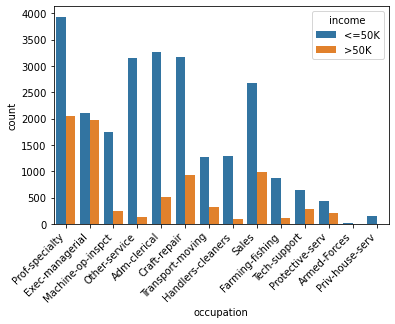

<Figure size 720x360 with 0 Axes>

In [47]:
cha=sns.countplot(df2['occupation'],hue=df2['income'])
plt.figure(figsize=(10,5))
cha.set_xticklabels(cha.get_xticklabels(),rotation=45, horizontalalignment='right')

In [48]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df2['occupation']= label_encoder.fit_transform(df2['occupation']) 
df2.corr()

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week
age,1.000000,0.036527,0.001739,0.120095,0.050537,0.068756
education-num,0.036527,1.000000,0.070954,0.115444,0.076386,0.148123
occupation,0.001739,0.070954,1.000000,0.009140,0.009796,-0.012879
capital-gain,0.120095,0.115444,0.009140,1.000000,-0.066678,0.075016
capital-loss,0.050537,0.076386,0.009796,-0.066678,1.000000,0.050439
hours-per-week,0.068756,0.148123,-0.012879,0.075016,0.050439,1.000000


In [49]:
#df2['native-country']= label_encoder.fit_transform(df2['native-country']) 
df2['income']= label_encoder.fit_transform(df2['income']) 

In [50]:
df2.head(30)

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
0,90,9,9,0,1,40,0
1,82,9,3,0,1,18,0
2,66,10,9,0,1,40,0
3,54,4,6,0,1,40,0
4,41,10,9,0,1,40,0
5,34,9,7,0,1,45,0
6,38,6,0,0,1,40,0
7,74,16,9,0,1,20,1
8,68,9,9,0,1,40,0
9,41,10,2,0,1,60,1


#### Checking correlation between the each columns

In [52]:
df2.corr()

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.036527,0.001739,0.120095,0.050537,0.068756,0.234037
education-num,0.036527,1.000000,0.070954,0.115444,0.076386,0.148123,0.335154
occupation,0.001739,0.070954,1.000000,0.009140,0.009796,-0.012879,0.034625
capital-gain,0.120095,0.115444,0.009140,1.000000,-0.066678,0.075016,0.266162
capital-loss,0.050537,0.076386,0.009796,-0.066678,1.000000,0.050439,0.138692
hours-per-week,0.068756,0.148123,-0.012879,0.075016,0.050439,1.000000,0.229689
income,0.234037,0.335154,0.034625,0.266162,0.138692,0.229689,1.000000


In [53]:
df2.describe()

,age,education-num,occupation,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,6.138755,0.083290,0.046651,40.437456,0.240810
std,13.640433,2.572720,3.972708,0.276324,0.210893,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,3.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,6.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,9.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,13.000000,1.000000,1.000000,99.000000,1.000000


### Feature Extraction

In [54]:
y=df2['income']

In [55]:
x=df2.drop(['income'],axis=1)

### Splitting the data into training and testing test

In [56]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.2,random_state=1)

### Decision Tree Classifier

In [57]:
dt=DecisionTreeClassifier(min_samples_split=90,max_depth=11,criterion='gini')
dt.fit(X_train,Y_train)
print(dt.score(X_train,Y_train))

0.8227503071253072


### Confusion Matrix

Text(0.5, 15.0, 'predicted class')

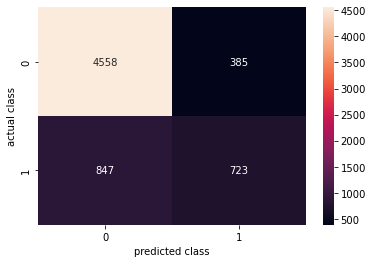

In [58]:
predicted_y=dt.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,predicted_y),annot=True,fmt='.5g')
plt.ylabel('actual class')
plt.xlabel('predicted class')

Predicting the Y for a sample

In [59]:
dt.predict([[34,13,11,0,2824,50]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [60]:
#input=[age,education-num,occupation,capital-gain,capital-loss,hours-per-week]
'''Occupation:
clerical             0
Armed-Forces         1
Craft-repair         2
Executive-managerial 3
Farming-fishing      4
Handlers-cleaners    5
Machine-inspector    6
Other-service        7
Priv-house-serv      8
Prof-specialty       9
Protective-serv      10
Sales                11
Tech-support         12
Transport-moving     13
'''

inp=[33,15,7,0,0,40]
out=dt.predict([inp])
if out[0]==1:
    print("Person income is greater than $50000")
else:
    print("Person income is less than $50000")

Person income is greater than $50000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [61]:
#import pickle
#pickle.dump(dt,open(r'C:\Users\P S V Srinivas\Desktop\app\model.sav', 'wb'))